In [179]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import csv
import os

In [318]:
# File to Load (Remember to Change These)
file_to_load = "dogs.csv"

# Read dogs File and store into Pandas data frame
dogs = pd.read_csv(file_to_load)

dogs.head()


,Unnamed: 0,id,organization_id,url,type,species,breeds,colors,age,gender,...,color1,color2,color3,spayed_neutered,house_trained,special_needs,shots_current,friendly_children,friendly_dogs,friendly_cats
0,0,47072487,CA803,https://www.petfinder.com/dog/rowan-47072487/c...,Dog,Dog,"{'primary': 'Siberian Husky', 'secondary': Non...","{'primary': None, 'secondary': None, 'tertiary...",Adult,Female,...,NaN,NaN,NaN,True,False,False,False,NaN,NaN,NaN
1,1,47072473,IN112,https://www.petfinder.com/dog/freeway-47072473...,Dog,Dog,"{'primary': 'Jack Russell Terrier', 'secondary...","{'primary': 'Brown / Chocolate', 'secondary': ...",Senior,Male,...,Brown / Chocolate,White / Cream,NaN,True,False,True,True,True,True,NaN
2,2,47072474,NC924,https://www.petfinder.com/dog/tokie-47072474/n...,Dog,Dog,"{'primary': 'Shih Tzu', 'secondary': None, 'mi...","{'primary': 'White / Cream', 'secondary': None...",Young,Male,...,White / Cream,NaN,NaN,True,True,False,True,False,NaN,False
3,3,47072469,GA916,https://www.petfinder.com/dog/rambo-47072469/f...,Dog,Dog,"{'primary': 'Cocker Spaniel', 'secondary': Non...","{'primary': 'Black', 'secondary': 'Yellow / Ta...",Young,Male,...,Black,Yellow / Tan / Blond / Fawn,NaN,True,True,False,True,NaN,True,NaN
4,4,47072434,ON305,https://www.petfinder.com/dog/rosie-and-posie-...,Dog,Dog,"{'primary': 'Goldendoodle', 'secondary': None,...","{'primary': None, 'secondary': None, 'tertiary...",Baby,Female,...,NaN,NaN,NaN,False,True,False,True,True,True,True


In [181]:
# Look for the colomn names
dogs.keys()

Index(['Unnamed: 0', 'id', 'organization_id', 'url', 'type', 'species',
       'breeds', 'colors', 'age', 'gender', 'size', 'coat', 'attributes',
       'environment', 'tags', 'name', 'description', 'photos', 'status',
       'status_changed_at', 'published_at', 'distance', 'contact', '_links',
       'primary_breed', 'secondary_breeds', 'city', 'state', 'zip', 'country',
       'color1', 'color2', 'color3', 'spayed_neutered', 'house_trained',
       'special_needs', 'shots_current', 'friendly_children', 'friendly_dogs',
       'friendly_cats'],
      dtype='object')

In [182]:
# Count unique values
unseries = dogs.nunique()
unseries

Unnamed: 0           20000
id                   19947
organization_id       3346
url                  19947
type                     1
species                  1
breeds                1905
colors                 188
age                      4
gender                   2
size                     4
coat                     6
attributes              16
environment             27
tags                   883
name                  9363
description          11970
photos               18737
status                   3
status_changed_at    13719
published_at         13790
distance                 0
contact               3597
_links               19947
primary_breed          207
secondary_breeds       157
city                  2050
state                   60
zip                   3074
country                  2
color1                  15
color2                  15
color3                  12
spayed_neutered          2
house_trained            2
special_needs            2
shots_current            2
f

In [183]:
# Filter data set for female dogs
female_dogs_df = dogs[dogs["gender"]=="Female"]
female_dogs_df.head()

,Unnamed: 0,id,organization_id,url,type,species,breeds,colors,age,gender,...,color1,color2,color3,spayed_neutered,house_trained,special_needs,shots_current,friendly_children,friendly_dogs,friendly_cats
0,0,47072487,CA803,https://www.petfinder.com/dog/rowan-47072487/c...,Dog,Dog,"{'primary': 'Siberian Husky', 'secondary': Non...","{'primary': None, 'secondary': None, 'tertiary...",Adult,Female,...,NaN,NaN,NaN,True,False,False,False,NaN,NaN,NaN
4,4,47072434,ON305,https://www.petfinder.com/dog/rosie-and-posie-...,Dog,Dog,"{'primary': 'Goldendoodle', 'secondary': None,...","{'primary': None, 'secondary': None, 'tertiary...",Baby,Female,...,NaN,NaN,NaN,False,True,False,True,True,True,True
7,7,47072432,OH415,https://www.petfinder.com/dog/christmas-past-4...,Dog,Dog,"{'primary': 'Beagle', 'secondary': 'Jack Russe...","{'primary': 'Tricolor (Brown, Black, & White)'...",Baby,Female,...,"Tricolor (Brown, Black, & White)",NaN,NaN,True,False,False,True,NaN,NaN,NaN
8,8,47072466,KS07,https://www.petfinder.com/dog/gwen-47072466/ks...,Dog,Dog,"{'primary': 'Dogue de Bordeaux', 'secondary': ...","{'primary': None, 'secondary': None, 'tertiary...",Adult,Female,...,NaN,NaN,NaN,True,False,False,True,NaN,NaN,NaN
11,11,47072445,TX2126,https://www.petfinder.com/dog/priscilla-470724...,Dog,Dog,{'primary': 'Australian Cattle Dog / Blue Heel...,"{'primary': None, 'secondary': None, 'tertiary...",Young,Female,...,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN


In [184]:
# Filter data set for male dogs
male_dogs_df = dogs[dogs["gender"]=="Male"]
male_dogs_df.head()

,Unnamed: 0,id,organization_id,url,type,species,breeds,colors,age,gender,...,color1,color2,color3,spayed_neutered,house_trained,special_needs,shots_current,friendly_children,friendly_dogs,friendly_cats
1,1,47072473,IN112,https://www.petfinder.com/dog/freeway-47072473...,Dog,Dog,"{'primary': 'Jack Russell Terrier', 'secondary...","{'primary': 'Brown / Chocolate', 'secondary': ...",Senior,Male,...,Brown / Chocolate,White / Cream,NaN,True,False,True,True,True,True,NaN
2,2,47072474,NC924,https://www.petfinder.com/dog/tokie-47072474/n...,Dog,Dog,"{'primary': 'Shih Tzu', 'secondary': None, 'mi...","{'primary': 'White / Cream', 'secondary': None...",Young,Male,...,White / Cream,NaN,NaN,True,True,False,True,False,NaN,False
3,3,47072469,GA916,https://www.petfinder.com/dog/rambo-47072469/f...,Dog,Dog,"{'primary': 'Cocker Spaniel', 'secondary': Non...","{'primary': 'Black', 'secondary': 'Yellow / Ta...",Young,Male,...,Black,Yellow / Tan / Blond / Fawn,NaN,True,True,False,True,NaN,True,NaN
5,5,47072460,AR238,https://www.petfinder.com/dog/spanky-47072460/...,Dog,Dog,"{'primary': 'Spaniel', 'secondary': 'Pointer',...","{'primary': 'White / Cream', 'secondary': 'Yel...",Young,Male,...,White / Cream,Yellow / Tan / Blond / Fawn,NaN,True,False,False,True,True,True,NaN
6,6,47072459,IN53,https://www.petfinder.com/dog/twix-star-1-20-2...,Dog,Dog,"{'primary': 'Treeing Walker Coonhound', 'secon...","{'primary': None, 'secondary': None, 'tertiary...",Young,Male,...,NaN,NaN,NaN,True,True,False,True,NaN,True,NaN


In [185]:
#Count a frequency of each name within the data set and display the top 10 name
female_name = female_dogs_df['name'].value_counts()
female_name.head(10)

bella    75
lucy     65
luna     60
daisy    58
molly    56
lola     44
sadie    40
sasha    36
holly    36
coco     35
Name: name, dtype: int64

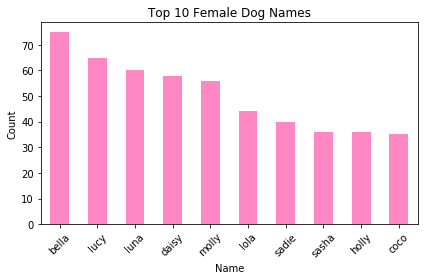

In [309]:
#Plot a bar chart
female_name_plot = female_name.iloc[0:10].plot.bar(color='hotpink', alpha=0.8, align="center")

# Set a Title and labels
plt.title("Top 10 Female Dog Names")
plt.xlabel("Name")
plt.ylabel("Count")

#Set xticks rotation
plt.xticks(rotation=45)

plt.tight_layout()

# Save the Figure
plt.savefig("Top 10 Female Dog Names.png")

# Show the figure
plt.show()


In [302]:
#Count a frequency of each name within the data set
male_name = male_dogs_df['name'].value_counts()
male_name.head(10)

max        84
buddy      62
charlie    53
bear       43
jack       42
duke       42
rocky      41
toby       34
milo       34
finn       30
Name: name, dtype: int64

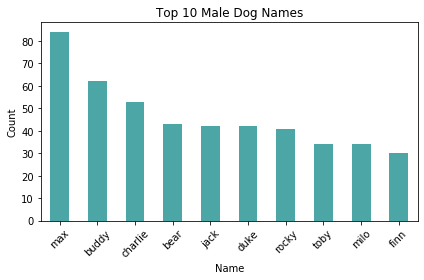

In [310]:
#Plot a bar chart
Male_name_plot = male_name.iloc[0:10].plot.bar(color='teal', alpha=0.7, align="center")

# Set a Title and labels
plt.title("Top 10 Male Dog Names")
plt.xlabel("Name")
plt.ylabel("Count")

#Set xticks rotation
plt.xticks(rotation=45)

plt.tight_layout()

# Save the Figure
plt.savefig("Top 10 Male Dog Names.png")

# Show the figure
plt.show()

In [189]:
#Find total number of dogs in the data set
total_population = len(dogs.house_trained)
total_population

20000

In [190]:
# Group data by status
groupby_status_sw = dogs.groupby("status")

# Filter for House-Trained attributes 
groupby_status_count = groupby_status_sw["house_trained"].count()

#Find percentage of house-trained dog by status
groupby_status_count_percentage = (groupby_status_count/total_population)

# Display the summary data frame 
house_trained_df = pd.DataFrame({"groupby_status_count": groupby_status_count,"groupby_status_count_percentage":groupby_status_count_percentage})

# Format with %
house_trained_df.style.format({"groupby_status_count_percentage": "{:,.2%}"})


,groupby_status_count,groupby_status_count_percentage
status,,
adoptable,18214,91.07%
adopted,1746,8.73%
found,40,0.20%


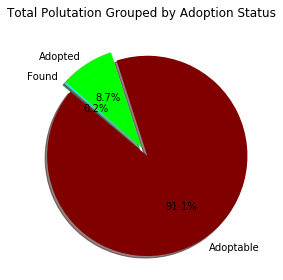

In [311]:
# Labels for the sections of our pie chart
labels = ["Adoptable", "Adopted", "Found"]

# The values of each section of the pie chart
sizes = [18214, 1746, 40]

# The colors of each section of the pie chart
colors = ["maroon", "lime", "aqua"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Add title
plt.title("Total Polutation Grouped by Adoption Status")

plt.tight_layout()

# Save the Figure
plt.savefig("Total Polutation Grouped by Adoption Status.png")

# Show the figure
plt.show()

In [192]:
# Looking into the adoption population to compare the adoption rate of dogs that are house trained 
# and not yet being house trained
adopted_training_status_count = dogs[dogs.status=='adopted'].groupby(['house_trained'])["status"].value_counts()
adopted_training_status_count_df  = pd.DataFrame({"Adopted Dogs Training Status Count":adopted_training_status_count})

adopted_training_status_count_df.reset_index(inplace = True)
adopted_training_status_count_df

,house_trained,status,Adopted Dogs Training Status Count
0,False,adopted,1250
1,True,adopted,496


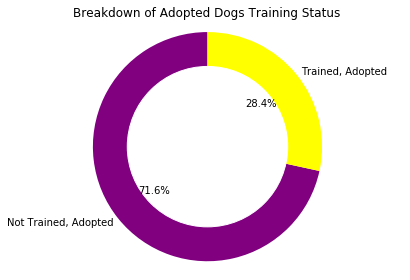

In [315]:
# Labels for the sections of our pie chart
labels = ["Not Trained, Adopted", "Trained, Adopted"]

# The values of each section of the pie chart
sizes = [1250, 496]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
adopted_dogs_training_status_count = plt.pie(sizes, labels=labels, autopct='%1.1f%%',
           startangle=90, labeldistance=1.05, colors=["purple", "yellow"])

# Draw a circle at the center of pie to make it look like a donut
my_circle = plt.Circle((0, 0), 0.7, color='white')

#Add title
plt.title("Breakdown of Adopted Dogs Training Status")

plt.axis('equal')
plt.gca().add_artist(my_circle)

plt.tight_layout()

# Save the Figure
plt.savefig("Breakdown of Adopted Dogs Training Status.png")

# Show the figure
plt.show()

In [194]:
# Count total of dogs that are house trained and not yet house trained
overall_training_status_count = dogs['house_trained'].value_counts()
overall_training_status_count_df = pd.DataFrame({"Overall Training Status Count":overall_training_status_count})
overall_training_status_count_df

,Overall Training Status Count
False,16012
True,3988


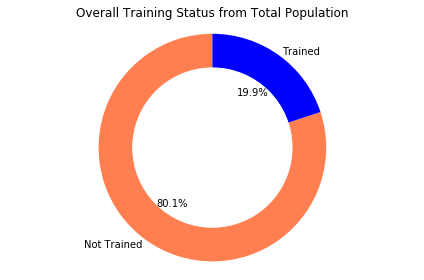

In [321]:
# Labels for the sections of our pie chart
labels = ["Not Trained", "Trained"]

# The values of each section of the pie chart
sizes = [16012, 3988]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
overall_training_status_count = plt.pie(sizes, labels=labels, autopct='%1.1f%%',
           startangle=90, labeldistance=1.05, colors=["coral", "blue"])

# Draw a circle at the center of pie to make it look like a donut
my_circle = plt.Circle((0, 0), 0.7, color='white')

#Add title
plt.title("Overall Training Status from Total Population")

plt.axis('equal')
plt.gca().add_artist(my_circle)
            
plt.tight_layout()

# Save the Figure
plt.savefig("Breakdown of Overall Training Status from Total Population.png")

# Show the figure
plt.show()


In [300]:
# Calculate % of possibility of house trained dogs being adopted
possibility_of_house_trained_being_adopted = (adopted_training_status_count_df.iloc[:,2]/overall_training_status_count_df.iloc[:,0])*100

# Create a data frame
possibility_of_house_trained_being_adopted_df =  pd.DataFrame(possibility_of_house_trained_being_adopted)

# Add a column to the data frame
ht_status = ["Fales", "True"]
possibility_of_house_trained_being_adopted_df["Training_Status"] = ht_status
possibility_of_house_trained_being_adopted_df



,0,Training_Status
0,7.806645,Fales
1,12.437312,True


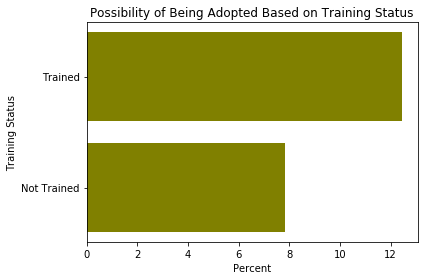

In [317]:
#Assign x and y value based on the above calculation
x = ["Not Trained", "Trained"]
y = [7.81, 12.44]

#possibility_of_house_trained_being_adopted_df.plot.barh(x,y)
plt.barh(x,y,color='olive', alpha=1.0, align="center")

# Set a Title and labels
plt.title("Possibility of Being Adopted Based on Training Status")
plt.xlabel("Percent")
plt.ylabel("Training Status")

plt.tight_layout()

# Save the Figure
plt.savefig("Possibility of Being Adopted Based on Training Status.png")

# Show the figure
plt.show()

In [34]:
status=dogs.groupby(['status']).mean()
status

,Unnamed: 0,id,distance,spayed_neutered,house_trained,special_needs,shots_current
status,,,,,,,
adoptable,9729.561107,4.704823e+07,NaN,0.642418,0.191666,0.012518,0.560228
adopted,12872.797251,4.703985e+07,NaN,0.702749,0.284078,0.016609,0.697595
found,7496.750000,4.705482e+07,NaN,0.175000,0.025000,0.000000,0.025000
